In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

# Set the font size for plots
plt.rcParams.update({'font.size': 14})

# Load the data
train = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
test = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")
sub_sample = pd.read_csv("/kaggle/input/nlp-getting-started/sample_submission.csv")

# Print the shape of the loaded datasets
print(f"Train shape: {train.shape}, Test shape: {test.shape}, Sample submission shape: {sub_sample.shape}")


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Train shape: (7613, 5), Test shape: (3263, 4), Sample submission shape: (3263, 2)


In [2]:
#First few rows of a train DataFrame object (default:5)
train.head(20)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [3]:
#counting the number of duplicated rows in the DataFrame train.
train.duplicated().sum()

0

In [4]:
# dropping duplicate entries, we got 0 duplicate so it won't drop anything
train = train.drop_duplicates().reset_index(drop=True)

<AxesSubplot: xlabel='count', ylabel='target'>

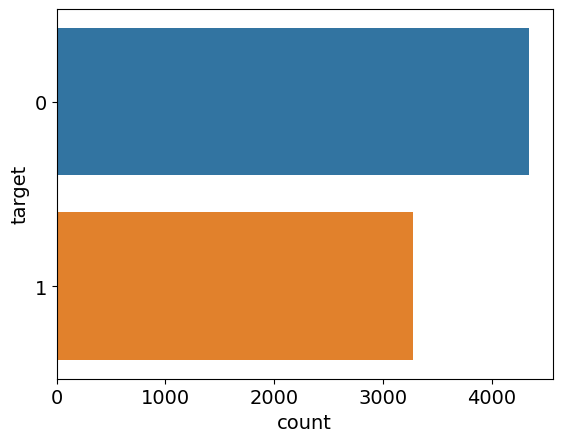

In [5]:
# Visualizing the class balance of the target variable
sns.countplot(y=train['target'])

In [6]:
# NaN values in wach columns
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [7]:
test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [8]:
# Find the unique keywords in train that are not in test
train_keywords = train['keyword'].nunique()
test_keywords = test['keyword'].nunique()
# unique_train_keywords = set(train.keyword.unique()) - set(test.keyword.unique())
print(f"Number of unique keywords in train data: {train_keywords}")
print(f"Number of unique keywords in test data: {train_keywords}")
# print(f"Unique keywords in train data: {unique_train_keywords}")


Number of unique keywords in train data: 221
Number of unique keywords in test data: 221


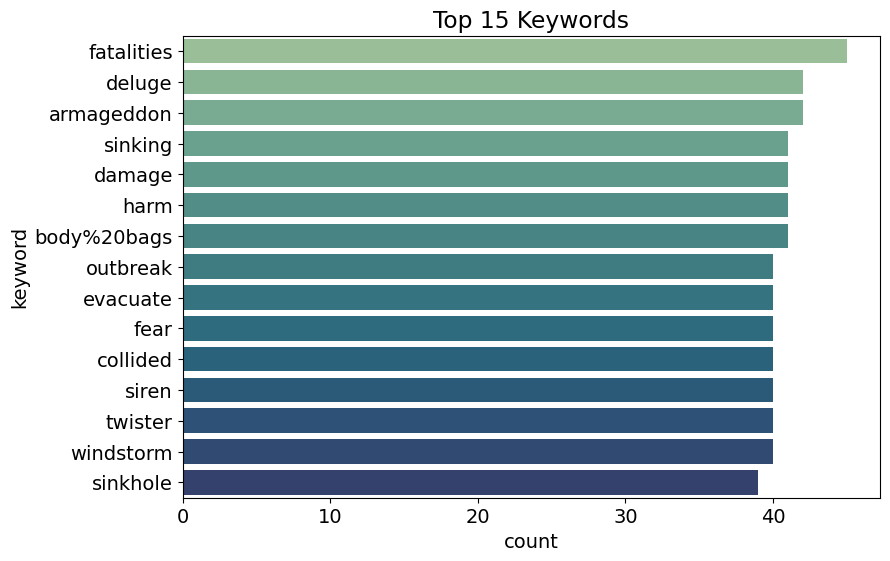

In [9]:
# Most common keywords
# Set the figure size and create a count plot
plt.figure(figsize=(9, 6))
sns.countplot(y=train['keyword'], order=train['keyword'].value_counts().head(15).index, palette='crest')

# Set the title and display the plot
plt.title('Top 15 Keywords')
plt.show()
# train.keyword.value_counts().head(10)

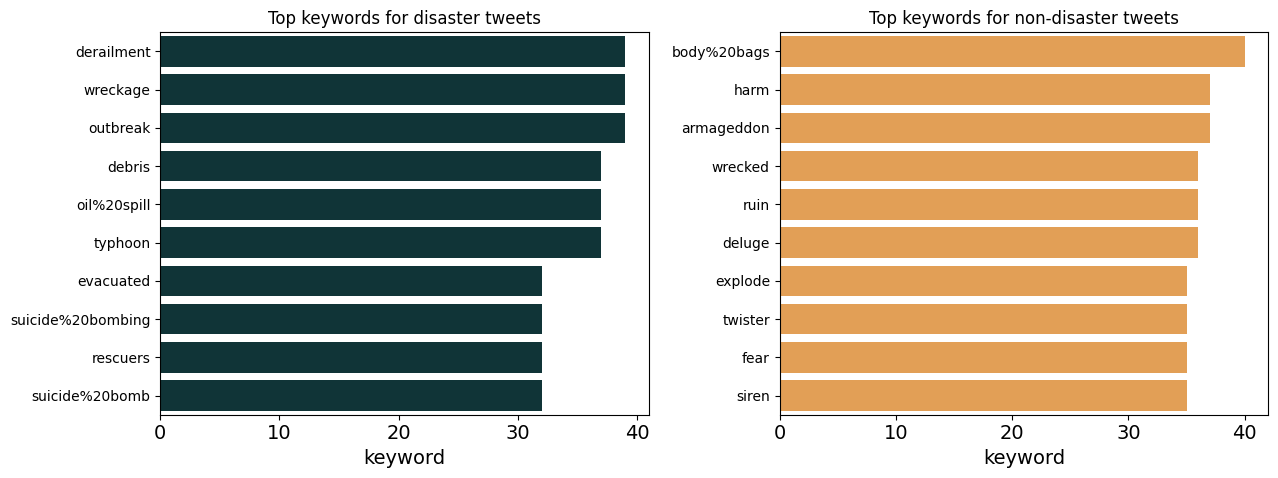

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 10 most common keywords for disaster and non-disaster tweets
kw_d = train.loc[train['target'] == 1, 'keyword'].value_counts().head(10)
kw_nd = train.loc[train['target'] == 0, 'keyword'].value_counts().head(10)

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,5))

# Plot the most common keywords in disaster and non-disaster tweets
sns.barplot(x=kw_d, y=kw_d.index, ax=axes[0], color='#093A3E')
sns.barplot(x=kw_nd, y=kw_nd.index, ax=axes[1], color='#F9A03F')

# Set the titles for the subplots and reduce the font size
axes[0].set_title('Top keywords for disaster tweets', fontsize=12)
axes[1].set_title('Top keywords for non-disaster tweets', fontsize=12)

# Set the font size for the tick labels on the y-axis
axes[0].tick_params(axis='y', labelsize=10)
axes[1].tick_params(axis='y', labelsize=10)

# Display the plot
plt.tight_layout()
plt.show()

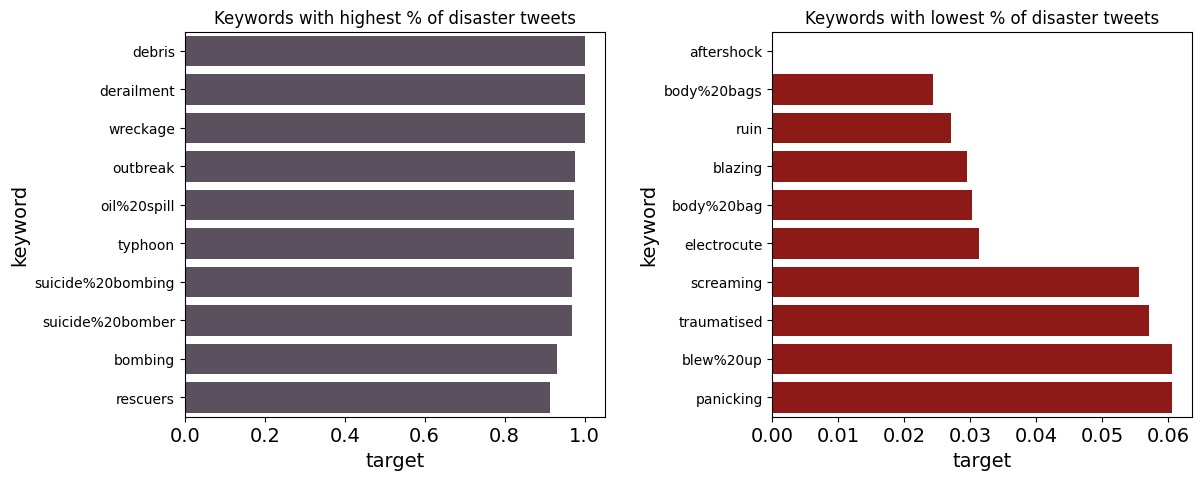

In [11]:
# Compute the top keywords with the highest and lowest percentage of disaster tweets
top_d = train.groupby('keyword')['target'].mean().nlargest(10)
top_nd = train.groupby('keyword')['target'].mean().nsmallest(10)

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

# Plot the top keywords with the highest and lowest percentage of disaster tweets
sns.barplot(x=top_d, y=top_d.index, color='#5D4E60', ax=axes[0])
sns.barplot(x=top_nd, y=top_nd.index, color='#A10702', ax=axes[1])

# Set the titles and font size for the subplots
axes[0].set_title('Keywords with highest % of disaster tweets', fontsize=12)
axes[1].set_title('Keywords with lowest % of disaster tweets', fontsize=12)

# Set the font size for the tick labels on the y-axis
axes[0].tick_params(axis='y', labelsize=10)
axes[1].tick_params(axis='y', labelsize=10)

# Adjust the horizontal space between the subplots
plt.subplots_adjust(wspace=0.4)

# Show the plot
plt.show()


In [12]:
# Print the number of unique keywords and locations in the training and test sets
print(f"Number of unique locations in training set: {train['location'].nunique()}")
print(f"Number of unique locations in test set: {test['location'].nunique()}")

Number of unique locations in training set: 3341
Number of unique locations in test set: 1602


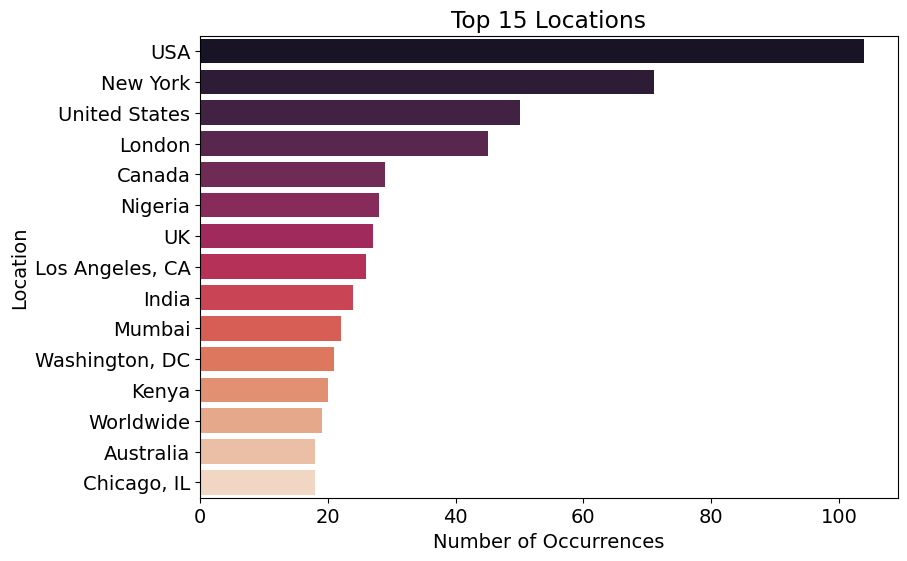

In [13]:
# Plot the most common locations in the training set
top_locations = train['location'].value_counts().iloc[:15]
plt.figure(figsize=(9, 6))
sns.countplot(y=train['location'], order=top_locations.index, palette='rocket')
plt.title('Top 15 Locations')
plt.xlabel('Number of Occurrences')
plt.ylabel('Location')
plt.show()

/tmp/ipykernel_23/648922696.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_target_by_location = top_only.groupby('location').mean()['target'].sort_values(ascending=False)


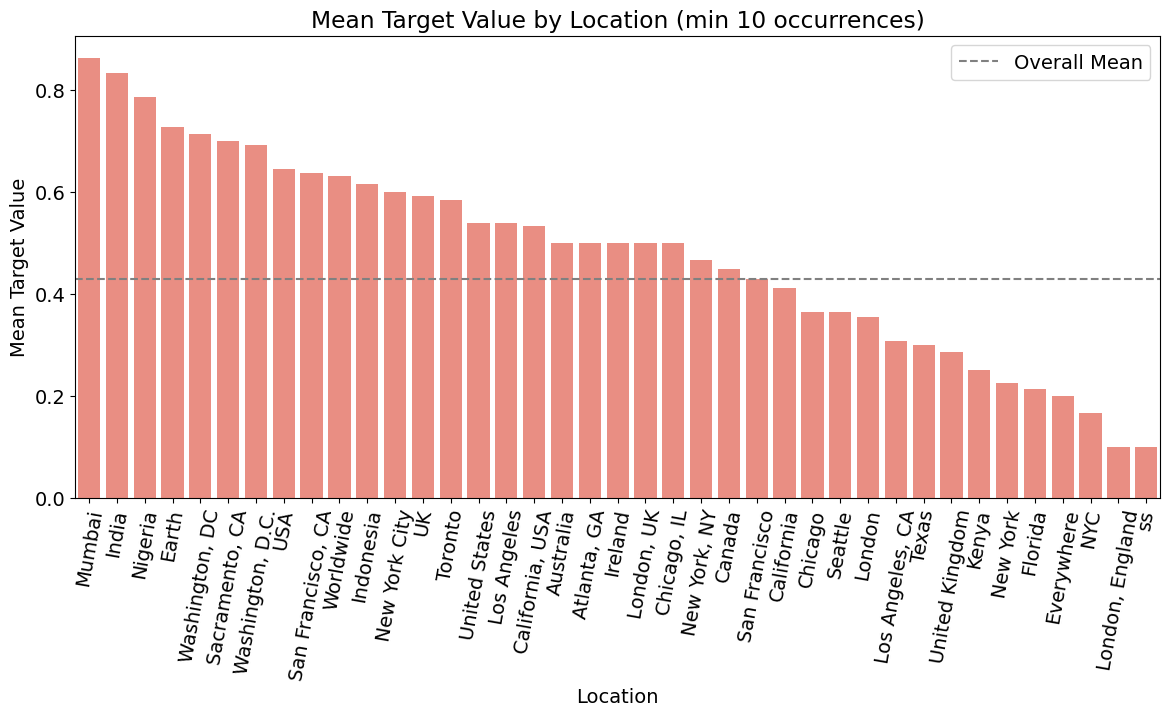

In [14]:
# Filter the training data to only include locations with at least 10 occurrences
min_occurrences = 10
top_loc = train['location'].value_counts()[train['location'].value_counts() >= min_occurrences].index
top_only = train[train['location'].isin(top_loc)]

# Compute the mean target value for each location and sort by descending order
mean_target_by_location = top_only.groupby('location').mean()['target'].sort_values(ascending=False)

# Plot the mean target value for each location
plt.figure(figsize=(14, 6))
sns.barplot(x=mean_target_by_location.index, y=mean_target_by_location, color='salmon')
plt.axhline(np.mean(train.target), color='gray', linestyle='--', label='Overall Mean')
plt.xticks(rotation=80)
plt.title(f'Mean Target Value by Location (min {min_occurrences} occurrences)')
plt.xlabel('Location')
plt.ylabel('Mean Target Value')
plt.legend()
plt.show()

In [15]:
# Fill NA values
train['keyword'] = train['keyword'].fillna('None')
train['location'] = train['location'].fillna('None')
test['keyword'] = test['keyword'].fillna('None')
test['location'] = test['location'].fillna('None')

# Define function to clean and standardize location names
def clean_loc(x):
    x = str(x).lower()
    if x == 'none':
        return 'None'
    elif any(word in x for word in ['earth', 'worldwide', 'everywhere']):
        return 'World'
    elif 'new york' in x or 'nyc' in x:
        return 'New York'    
    elif 'london' in x:
        return 'London'
    elif 'mumbai' in x:
        return 'Mumbai'
    elif 'washington' in x and 'd' in x and 'c' in x:
        return 'Washington DC'
    elif 'san francisco' in x:
        return 'San Francisco'
    elif 'los angeles' in x:
        return 'Los Angeles'
    elif 'seattle' in x:
        return 'Seattle'
    elif 'chicago' in x:
        return 'Chicago'
    elif 'toronto' in x:
        return 'Toronto'
    elif 'sacramento' in x:
        return 'Sacramento'
    elif 'atlanta' in x:
        return 'Atlanta'
    elif 'california' in x:
        return 'California'
    elif 'florida' in x:
        return 'Florida'
    elif 'texas' in x:
        return 'Texas'
    elif 'united states' in x or 'usa' in x:
        return 'USA'
    elif 'united kingdom' in x or 'uk' in x or 'britain' in x:
        return 'UK'
    elif 'canada' in x:
        return 'Canada'
    elif 'india' in x:
        return 'India'
    elif 'kenya' in x:
        return 'Kenya'
    elif 'nigeria' in x:
        return 'Nigeria'
    elif 'australia' in x:
        return 'Australia'
    elif 'indonesia' in x:
        return 'Indonesia'
    elif x in top_loc:
        return x
    else:
        return 'Others'

# Define top location list
raw_loc = train['location'].value_counts()
top_loc = list(raw_loc[raw_loc >= 10].index)

# Clean and standardize location names for train and test dataframes
train['location_clean'] = train['location'].apply(clean_loc)
test['location_clean'] = test['location'].apply(clean_loc)


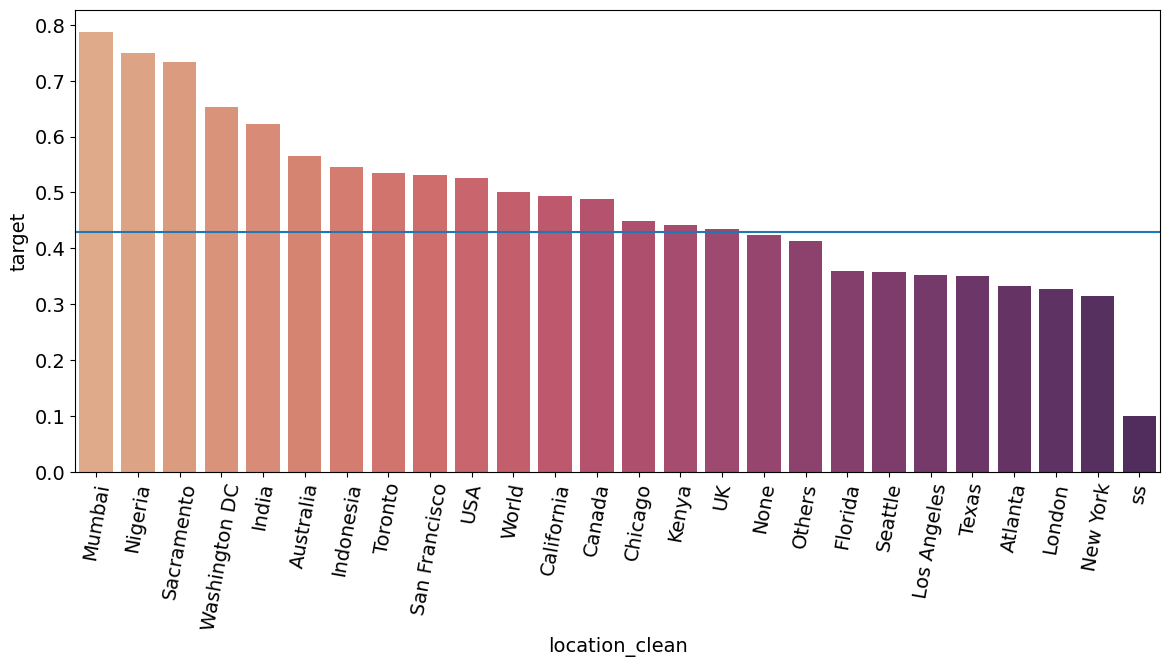

In [16]:
# top_l2 = train.groupby('location_clean').mean()['target'].sort_values(ascending=False)
top_l2 = train.groupby('location_clean')['target'].mean().sort_values(ascending=False)
plt.figure(figsize=(14,6))
sns.barplot(x=top_l2.index, y=top_l2, palette="flare")
plt.axhline(np.mean(train.target))
plt.xticks(rotation=80)
plt.show()

In [17]:
# Read the leaked data file and create a binary target column based on the 'choose_one' column
leak = pd.read_csv("../input/disasters-on-social-media/socialmedia-disaster-tweets-DFE.csv", encoding='latin_1')
leak['target'] = (leak['choose_one'] == 'Relevant').astype(int)

# Create a new 'id' column with the index values of the leaked data
leak['id'] = leak.index

# Select only the 'id', 'target', and 'text' columns from the leaked data and store it in a new dataframe
leak = leak[['id', 'target', 'text']]

# Merge the leaked data with the test data on the 'id' column and store the result in a new dataframe
merged_df = pd.merge(test, leak, on='id')

# Select only the 'id' and 'target' columns from the merged dataframe and save it to a CSV file for submission
sub1 = merged_df[['id', 'target']]
sub1.to_csv('submit_1.csv', index=False)

In [18]:
# import regular expressions module
import re

# get a sample text from the dataset
test_str = train.loc[417, 'text']

# define a function to clean the text
def clean_text(text):
    # remove links starting with http:// or https://
    text = re.sub(r'https?://\S+', '', text)
    # remove line breaks
    text = re.sub(r'\n', ' ', text)
    # replace any sequence of whitespace characters with a single space
    text = re.sub('\s+', ' ', text).strip()
    # return the cleaned text
    return text

# print the original and cleaned text
print("Original text: " + test_str)
print("Cleaned text: " + clean_text(test_str))

Original text: Arson suspect linked to 30 fires caught in Northern California http://t.co/mmGsyAHDzb
Cleaned text: Arson suspect linked to 30 fires caught in Northern California


In [19]:
# Define function to find hashtags in a tweet
def find_hashtags(tweet):
    return " ".join([match.group(0)[1:] for match in re.finditer(r"#\w+", tweet)]) or 'no'

# Define function to find mentions in a tweet
def find_mentions(tweet):
    return " ".join([match.group(0)[1:] for match in re.finditer(r"@\w+", tweet)]) or 'no'

# Define function to find links in a tweet
def find_links(tweet):
    return " ".join([match.group(0)[:] for match in re.finditer(r"https?://\S+", tweet)]) or 'no'

# Define function to process text in a DataFrame
def process_text(df):
    
    # Apply the `clean_text` function to the `text` column
    df['text_clean'] = df['text'].apply(lambda x: clean_text(x))
    
    # Apply the `find_hashtags` function to the `text` column and add the result to a new `hashtags` column
    df['hashtags'] = df['text'].apply(lambda x: find_hashtags(x))
    
    # Apply the `find_mentions` function to the `text` column and add the result to a new `mentions` column
    df['mentions'] = df['text'].apply(lambda x: find_mentions(x))
    
    # Apply the `find_links` function to the `text` column and add the result to a new `links` column
    df['links'] = df['text'].apply(lambda x: find_links(x))
    
    # Return the modified DataFrame
    return df

# Apply the `process_text` function to the `train` and `test` DataFrames
train = process_text(train)
test = process_text(test)


In [20]:
from wordcloud import STOPWORDS

def create_stat(df):
    # Tweet length
    df['text_len'] = df['text_clean'].apply(len)
    # Word count
    df['word_count'] = df["text_clean"].apply(lambda x: len(str(x).split()))
    # Stopword count
    df['stop_word_count'] = df['text_clean'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
    # Punctuation count
    df['punctuation_count'] = df['text_clean'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
    # Count of hashtags (#)
    df['hashtag_count'] = df['hashtags'].apply(lambda x: len(str(x).split()))
    # Count of mentions (@)
    df['mention_count'] = df['mentions'].apply(lambda x: len(str(x).split()))
    # Count of links
    df['link_count'] = df['links'].apply(lambda x: len(str(x).split()))
    # Count of uppercase letters
    df['caps_count'] = df['text_clean'].apply(lambda x: sum(1 for c in str(x) if c.isupper()))
    # Ratio of uppercase letters
    df['caps_ratio'] = df['caps_count'] / df['text_len']
    return df

train = create_stat(train)
test = create_stat(test)

print(train.shape, test.shape)

(7613, 19) (3263, 18)


In [21]:
# Computing the correlation coefficients between the 'target' column and all other numeric columns in the `train` DataFrame,
# then dropping the 'target' row and sorting the resulting Series by the correlation coefficients in ascending order.
train.corr(numeric_only=True)['target'].drop('target').sort_values()

stop_word_count     -0.111250
mention_count       -0.049654
caps_ratio          -0.014970
punctuation_count   -0.012535
word_count           0.017081
link_count           0.020244
caps_count           0.027808
hashtag_count        0.032853
id                   0.060781
text_len             0.096435
Name: target, dtype: float64

In [22]:
# Import necessary functions
from nltk import FreqDist, word_tokenize

# Use the existing set of stopwords
stopwords = STOPWORDS

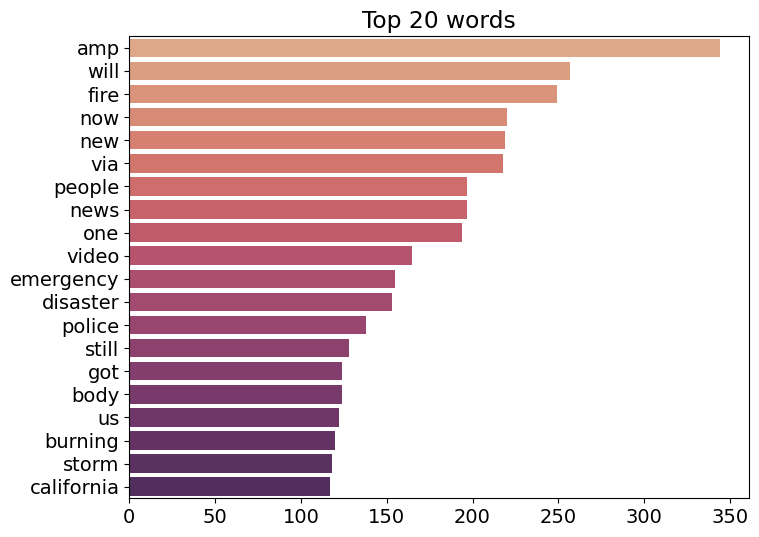

In [23]:
# Compute the word frequency distribution
word_freq = FreqDist(w for w in word_tokenize(' '.join(train['text_clean']).lower()) if w not in stopwords and w.isalpha())

# Select the top 20 most frequent words
top20w = pd.Series(dict(word_freq.most_common(20)))

# Plot a bar chart of the top 20 words
plt.figure(figsize=(8, 6))
sns.barplot(x=top20w.values, y=top20w.index, palette='flare')
plt.title('Top 20 words')
plt.show()


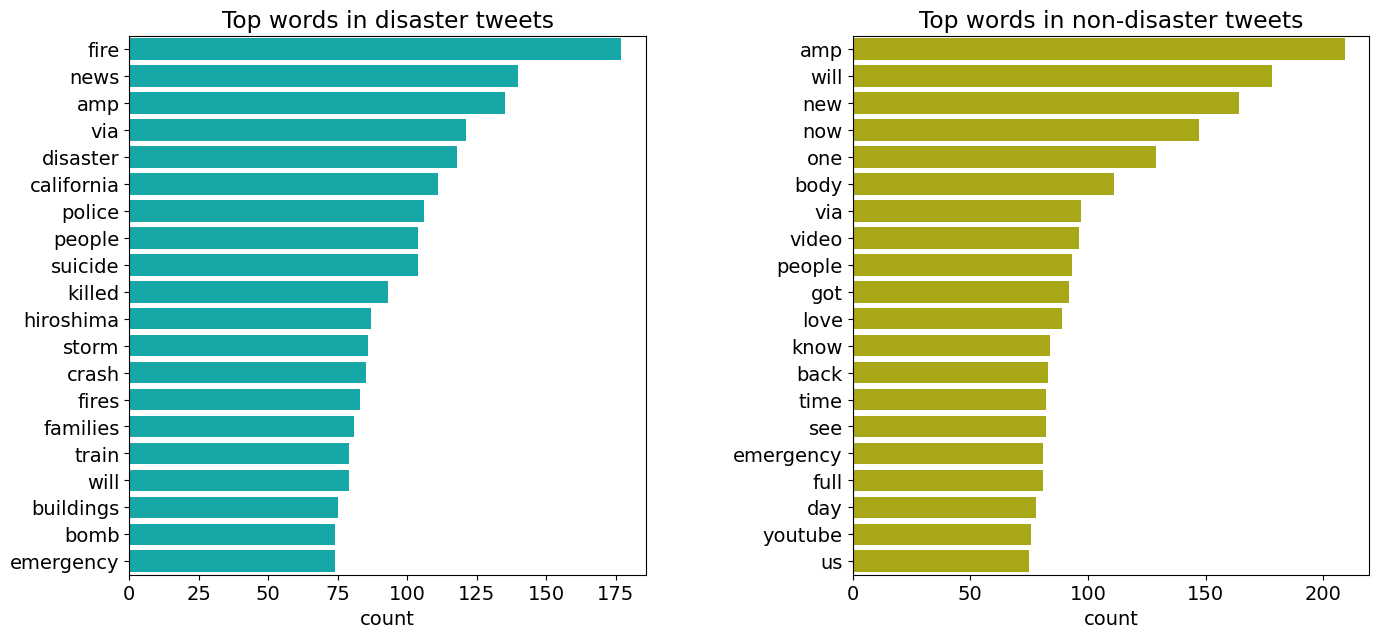

In [24]:
# Creating a figure with 2 subplots
plt.figure(figsize=(16,7))
plt.subplot(121)

# Creating a frequency distribution of words for disaster tweets
freq_d = FreqDist(w for w in word_tokenize(' '.join(train.loc[train.target==1, 'text_clean']).lower()) if 
                     (w not in stopwords) & (w.isalpha()))

# Converting frequency distribution to a DataFrame
df_d = pd.DataFrame.from_dict(freq_d, orient='index', columns=['count'])
top20_d = df_d.sort_values('count',ascending=False).head(20)

# Creating a bar plot of the top 20 most frequent words in disaster tweets
sns.barplot(x=top20_d['count'], y=top20_d.index, color='c')
plt.title('Top words in disaster tweets')

plt.subplot(122)

# Creating a frequency distribution of words for non-disaster tweets
freq_nd = FreqDist(w for w in word_tokenize(' '.join(train.loc[train.target==0, 'text_clean']).lower()) if 
                     (w not in stopwords) & (w.isalpha()))

# Converting frequency distribution to a DataFrame
df_nd = pd.DataFrame.from_dict(freq_nd, orient='index', columns=['count'])
top20_nd = df_nd.sort_values('count',ascending=False).head(20)

# Creating a bar plot of the top 20 most frequent words in non-disaster tweets
sns.barplot(x=top20_nd['count'], y=top20_nd.index, color='y')
plt.title('Top words in non-disaster tweets')

# Adjust the horizontal space between the subplots
plt.subplots_adjust(wspace=0.4)
plt.show()


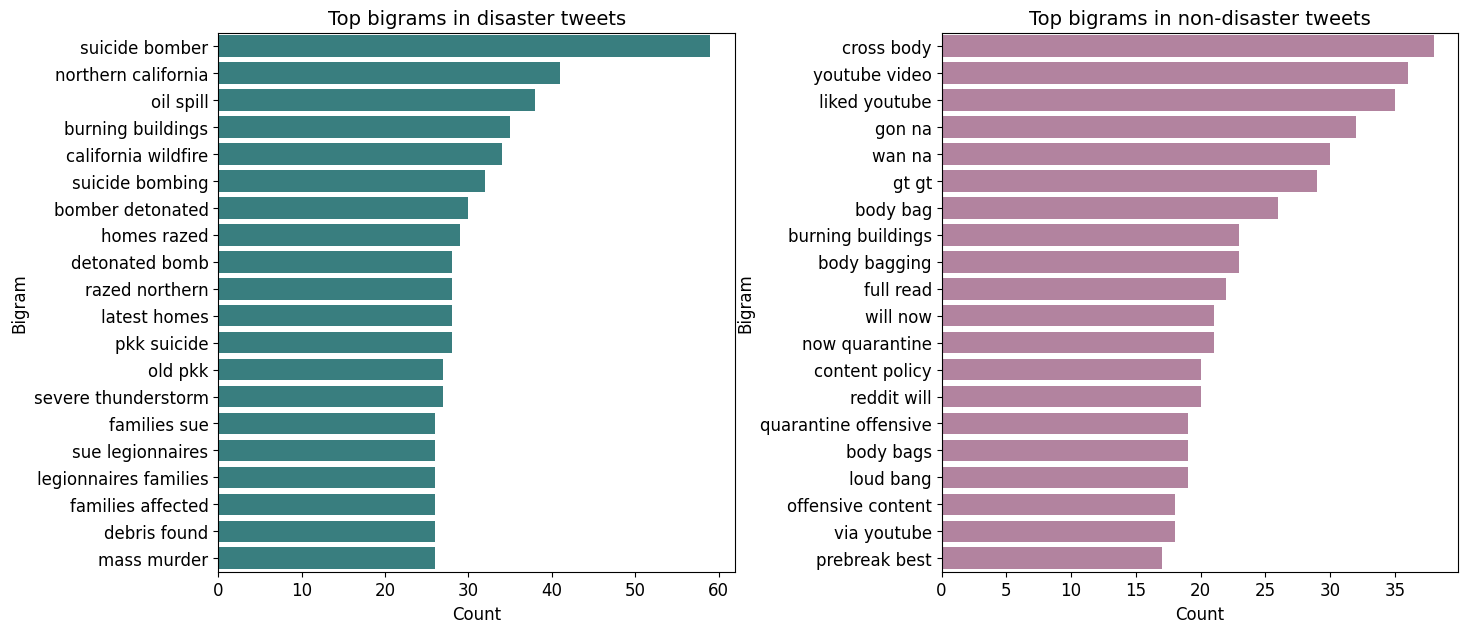

In [25]:
# Bigrams
from nltk import bigrams

plt.figure(figsize=(16,7))
plt.subplot(121)
bigram_d = list(bigrams([w for w in word_tokenize(' '.join(train.loc[train.target==1, 'text_clean']).lower()) if 
              (w not in stopwords) & (w.isalpha())]))
d_fq = FreqDist(bg for bg in bigram_d)
bgdf_d = pd.DataFrame.from_dict(d_fq, orient='index', columns=['count'])
bgdf_d.index = bgdf_d.index.map(lambda x: ' '.join(x))
bgdf_d = bgdf_d.sort_values('count',ascending=False)
sns.barplot(x=bgdf_d.head(20)['count'], y=bgdf_d.index[:20], color='#2D898B')
plt.title('Top bigrams in disaster tweets', fontsize=14, color='black')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Bigram', fontsize=12)

plt.subplot(122)
bigram_nd = list(bigrams([w for w in word_tokenize(' '.join(train.loc[train.target==0, 'text_clean']).lower()) if 
              (w not in stopwords) & (w.isalpha())]))
nd_fq = FreqDist(bg for bg in bigram_nd)
bgdf_nd = pd.DataFrame.from_dict(nd_fq, orient='index', columns=['count'])
bgdf_nd.index = bgdf_nd.index.map(lambda x: ' '.join(x))
bgdf_nd = bgdf_nd.sort_values('count',ascending=False)
sns.barplot(x=bgdf_nd.head(20)['count'], y=bgdf_nd.index[:20], color='#BA7BA1')
plt.title('Top bigrams in non-disaster tweets', fontsize=14, color='black')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Bigram', fontsize=12)
# Adjust the horizontal space between the subplots
plt.subplots_adjust(wspace=0.4)
plt.show()

In [26]:
import category_encoders as ce

# Target encoding
target_features = ['keyword', 'location_clean']

# Define the encoder and fit on the training data
encoder = ce.TargetEncoder(cols=target_features)
encoder.fit(train[target_features], train['target'])

# Transform the target features and add them as new columns to the dataframes
train = train.join(encoder.transform(train[target_features]).add_suffix('_target'))
test = test.join(encoder.transform(test[target_features]).add_suffix('_target'))

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer for links
vec_links = CountVectorizer(min_df=5, analyzer='word', token_pattern=r'https?://\S+')
link_vec = vec_links.fit_transform(train['links'])
link_vec_test = vec_links.transform(test['links'])
X_train_link = pd.DataFrame(link_vec.toarray(), columns=vec_links.get_feature_names_out())
X_test_link = pd.DataFrame(link_vec_test.toarray(), columns=vec_links.get_feature_names_out())

# CountVectorizer for mentions
vec_men = CountVectorizer(min_df=5)
men_vec = vec_men.fit_transform(train['mentions'])
men_vec_test = vec_men.transform(test['mentions'])
X_train_men = pd.DataFrame(men_vec.toarray(), columns=vec_men.get_feature_names_out())
X_test_men = pd.DataFrame(men_vec_test.toarray(), columns=vec_men.get_feature_names_out())

# CountVectorizer for hashtags
vec_hash = CountVectorizer(min_df=5)
hash_vec = vec_hash.fit_transform(train['hashtags'])
hash_vec_test = vec_hash.transform(test['hashtags'])
X_train_hash = pd.DataFrame(hash_vec.toarray(), columns=vec_hash.get_feature_names_out())
X_test_hash = pd.DataFrame(hash_vec_test.toarray(), columns=vec_hash.get_feature_names_out())

# Print shape of dataframes
print(X_train_link.shape, X_train_men.shape, X_train_hash.shape)


(7613, 6) (7613, 18) (7613, 107)


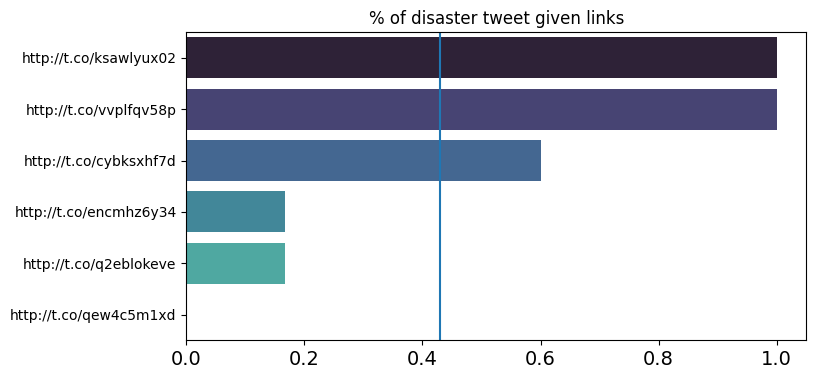

In [28]:
_ = (X_train_link.transpose().dot(train['target']) / X_train_link.sum(axis=0)).sort_values(ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(x=_, y=_.index, palette='mako')
plt.yticks(fontsize=10)
plt.axvline(np.mean(train.target))
plt.title('% of disaster tweet given links',fontsize=12)
plt.show()


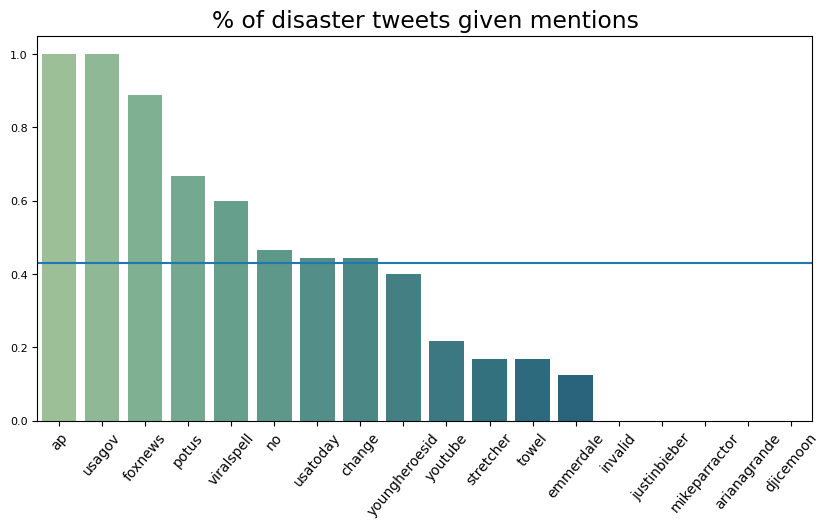

In [29]:
men_percent = (X_train_men.transpose().dot(train['target']) / X_train_men.sum(axis=0)).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=men_percent.index, y=men_percent, palette="crest")
plt.axhline(np.mean(train.target))
plt.title('% of disaster tweets given mentions')
plt.xticks(rotation=50, fontsize=10)
plt.yticks(fontsize=8)
plt.show()

In [30]:
hash_rank = (X_train_hash.transpose().dot(train['target']) / X_train_hash.sum(axis=0)).sort_values(ascending=False)
disaster_100 = list(hash_rank[hash_rank==1].index)
print('Hashtags with which 100% of Tweets are disasters: ', disaster_100)
print('Total: ', len(disaster_100))
no_disaster = list(hash_rank[hash_rank==0].index)
print('Hashtags with which 0% of Tweets are disasters: ', no_disaster)
print('Total: ', len(no_disaster))


Hashtags with which 100% of Tweets are disasters:  ['abstorm', 'earthquake', 'hiroshima', 'india', 'japan', 'libya', 'africa', 'mumbai', 'myanmar', 'newyork', 'okwx', 'rohingya', 'science', 'sittwe', 'socialnews', 'wildfire', 'wildfires', 'worldnews', 'wx', 'hailstorm', 'mh370', 'yyc', 'disaster', 'breaking', 'bestnaijamade', 'antioch']
Total:  26
Hashtags with which 0% of Tweets are disasters:  ['dubstep', 'edm', 'animalrescue', 'fashion', 'technology', 'dance', 'trapmusic', 'ices', 'np', 'job', 'jobs', 'summerfate', 'kindle', 'soundcloud', 'military', 'bb17', 'beyhive', 'dnb']
Total:  18


In [31]:
# Tf-idf for text
from sklearn.feature_extraction.text import TfidfVectorizer

vec_text = TfidfVectorizer(min_df=10, ngram_range=(1,2), stop_words='english') 
# Only include terms with >=10 occurrences
# Include both unigrams and bigrams
text_vec = vec_text.fit_transform(train['text_clean'])
text_vec_test = vec_text.transform(test['text_clean'])
X_train_text = pd.DataFrame(text_vec.toarray(), columns=vec_text.get_feature_names_out())
X_test_text = pd.DataFrame(text_vec_test.toarray(), columns=vec_text.get_feature_names_out())
print(X_train_text.shape)


(7613, 1691)


In [32]:
# Joining the dataframes together

train = train.join(X_train_link, rsuffix='_link')
train = train.join(X_train_men, rsuffix='_mention')
train = train.join(X_train_hash, rsuffix='_hashtag')
train = train.join(X_train_text, rsuffix='_text')
test = test.join(X_test_link, rsuffix='_link')
test = test.join(X_test_men, rsuffix='_mention')
test = test.join(X_test_hash, rsuffix='_hashtag')
test = test.join(X_test_text, rsuffix='_text')
print (train.shape, test.shape)

(7613, 1843) (3263, 1842)


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

features_to_drop = ['id', 'keyword', 'location', 'text', 'location_clean', 'text_clean', 'hashtags', 'mentions', 'links']

scaler = MinMaxScaler()
lr = LogisticRegression(solver='liblinear', random_state=777)

X_train = train.drop(columns=features_to_drop + ['target'])
X_test = test.drop(columns=features_to_drop)
y_train = train['target']

pipeline = Pipeline([
                     ('scaler', scaler),
                     ('logistic_regression', lr),
                    ])

pipeline.fit(X_train, y_train)

y_test = pipeline.predict(X_test)

submit = sub_sample.copy()
submit['target'] = y_test
submit.to_csv('submit_lr.csv', index=False)


In [34]:
print ('Training accuracy: %.4f' % pipeline.score(X_train, y_train))

Training accuracy: 0.8541


In [35]:
from sklearn.metrics import f1_score

y_train_pred = pipeline.predict(X_train)
f1 = f1_score(y_train, y_train_pred)
print(f'Training f-1 score: {f1:.4f}')

Training f-1 score: 0.8198


In [36]:
from sklearn.metrics import confusion_matrix

conf_matrix_train = confusion_matrix(y_train, pipeline.predict(X_train))
pd.DataFrame(conf_matrix_train)

,0,1
0,3975,367
1,744,2527


In [37]:
# Cross validation
from sklearn.model_selection import cross_val_score, ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=123)
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='f1')

print(f"Cross validation F-1 score: {np.mean(cv_scores):.3f}")

Cross validation F-1 score: 0.755


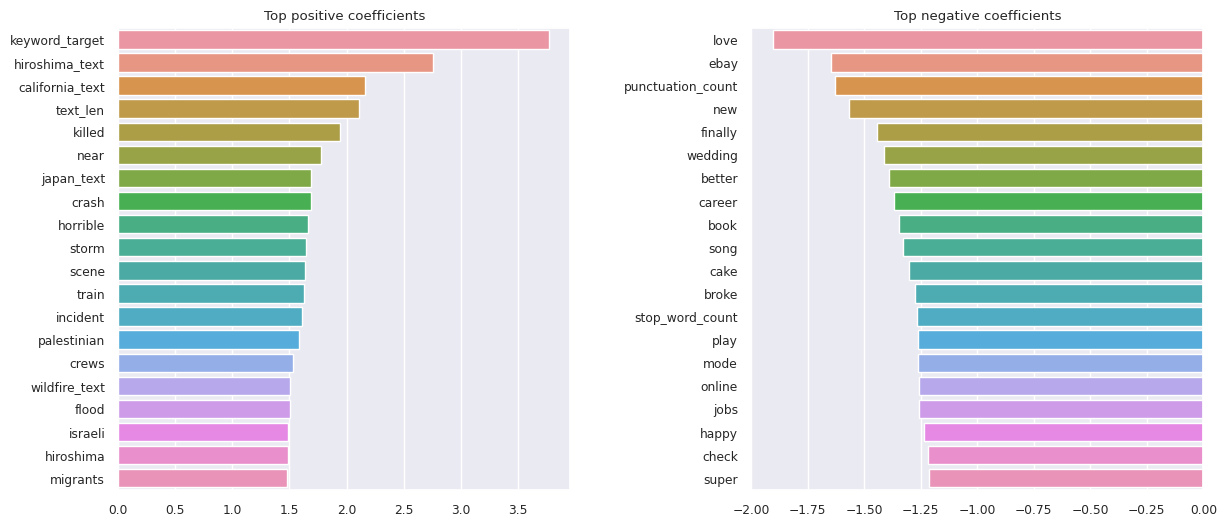

In [38]:
plt.figure(figsize=(14,6))
sns.set(font_scale=0.8) # reduce font size
s1 = pd.Series(np.transpose(lr.coef_[0]), index=X_train.columns).sort_values(ascending=False)[:20]
s2 = pd.Series(np.transpose(lr.coef_[0]), index=X_train.columns).sort_values()[:20]
plt.subplot(121)
sns.barplot(y=s1.index, x=s1)
plt.title('Top positive coefficients')
plt.subplot(122)
sns.barplot(y=s2.index, x=s2)
plt.title('Top negative coefficients')
# Adjust the horizontal space between the subplots
plt.subplots_adjust(wspace=0.4)
plt.show()


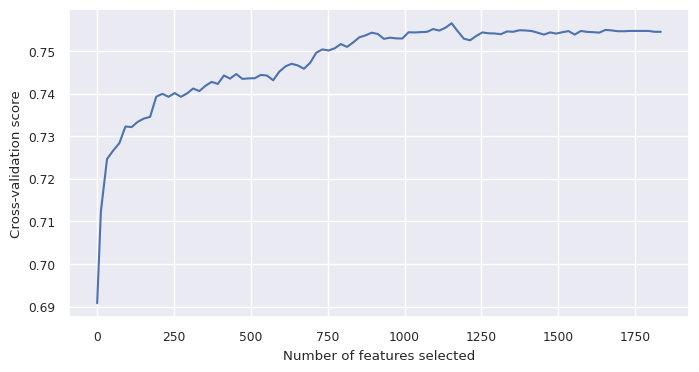

In [39]:
# Feature selection
from sklearn.feature_selection import RFECV

steps = 20
n_features = len(X_train.columns)
X_range = np.arange(n_features - (int(n_features/steps)) * steps, n_features+1, steps)

rfecv = RFECV(estimator=lr, step=steps, cv=cv, scoring='f1')

pipeline2 = Pipeline([('scale',scaler), ('rfecv', rfecv)])
pipeline2.fit(X_train, y_train)

plt.figure(figsize=(8,4))
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score")
plt.plot(np.insert(X_range, 0, 1), rfecv.cv_results_['mean_test_score'])
plt.show()

In [40]:
print ('Optimal no. of features: %d' % np.insert(X_range, 0, 1)[np.argmax(rfecv.cv_results_['mean_test_score'])])

Optimal no. of features: 1153


In [41]:
selected_features = X_train.columns[rfecv.support_]
X_train2 = X_train[selected_features]
X_test2 = X_test[selected_features]

In [42]:
# lr2 = LogisticRegression(solver='liblinear', random_state=37)
pipeline.fit(X_train2, y_train)
cv2 = ShuffleSplit(n_splits=5, test_size=0.2, random_state=456)
cv_score2 = cross_val_score(pipeline, X_train2, y_train, cv=cv2, scoring='f1')
print('Cross validation F-1 score: %.3f' % np.mean(cv_score2))

Cross validation F-1 score: 0.779


In [43]:
from sklearn.model_selection import GridSearchCV

grid = {"C": np.logspace(-2, 2, 5), "penalty": ["l1", "l2"]}
lr_cv = GridSearchCV(LogisticRegression(solver='liblinear', random_state=20), grid, cv=cv2, scoring='f1')

pipeline_grid = Pipeline([('scale', scaler), ('gridsearch', lr_cv)])

pipeline_grid.fit(X_train2, y_train)

print("Best parameters:", lr_cv.best_params_)
print("F-1 score: %.3f" % lr_cv.best_score_)

Best parameters: {'C': 1.0, 'penalty': 'l2'}
F-1 score: 0.779


In [44]:
# Submit fine-tuned model

y_test2 = pipeline_grid.predict(X_test2)
submit2 = sub_sample.copy()
submit2.target = y_test2
submit2.to_csv('submit_lr2.csv', index=False)

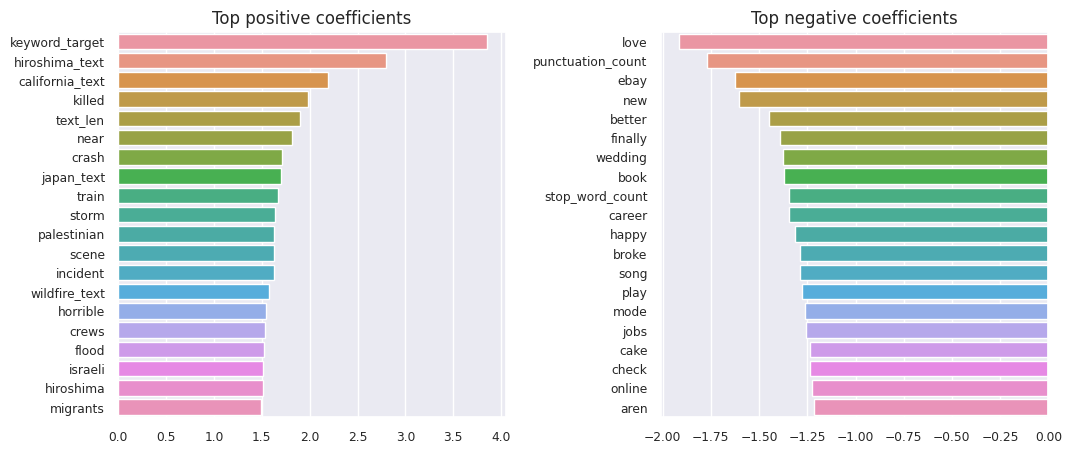

In [45]:
# Top features with fine-tuned model
plt.figure(figsize=(12,5))
s1 = pd.Series(np.transpose(lr.coef_[0]), index=X_train2.columns).sort_values(ascending=False)[:20]
s2 = pd.Series(np.transpose(lr.coef_[0]), index=X_train2.columns).sort_values()[:20]
plt.subplot(121)
sns.barplot(y=s1.index, x=s1)
plt.title('Top positive coefficients', fontsize=12)
plt.subplot(122)
sns.barplot(y=s2.index, x=s2)
plt.title('Top negative coefficients', fontsize=12)
# Adjust the horizontal space between the subplots
plt.subplots_adjust(wspace=0.4)
plt.show()

In [46]:
# Error analysis
y_hat = pipeline_grid.predict_proba(X_train2)[:,1]
checker = train.loc[:,['text','keyword','location','target']]
checker['pred_prob'] = y_hat
checker['error'] = np.abs(checker['target'] - checker['pred_prob'])

# Top 50 mispredicted tweets
error50 = checker.sort_values('error', ascending=False).head(50).reset_index(drop=True)
target_counts = error50.target.value_counts()
print(target_counts)

1    46
0     4
Name: target, dtype: int64


In [47]:
pd.options.display.max_colwidth = 200

error50.loc[0:10,['text','target','pred_prob']]

,text,target,pred_prob
0,all that panicking made me tired ;__; i want to sleep in my bed,1,0.037579
1,@OllyMursAus I do feel sorry for him! He is not a piece of meat! He is a nice guy... People don't need to rush him and screams in his face!,1,0.040447
2,The Opposite of Love is Fear HereÛªs Why\nhttp://t.co/r5bXZzhXkm,1,0.045533
3,@BenKin97 @Mili_5499 remember when u were up like 4-0 and blew it in one game? U probs don't because it was before the kings won the cup,1,0.045791
4,Do you feel like you are sinking in low self-image? Take the quiz: http://t.co/bJoJVM0pjX http://t.co/wHOc7LHb5F,1,0.048154
5,Hellfire! We donÛªt even want to think about it or mention it so letÛªs not do anything that leads to it #islam!,1,0.052682
6,Just came back from camping and returned with a new song which gets recorded tomorrow. Can't wait! #Desolation #TheConspiracyTheory #NewEP,1,0.053480
7,I liked a @YouTube video from @itsjustinstuart http://t.co/oDV3RqS8JU GUN RANGE MAYHEM!,1,0.056078
8,How long O Lord (Study 3)\n The sixth seal opens the events of Revelation 12. The political upheaval in the Roman... http://t.co/GW0CXoOJyV,1,0.056754
9,Crazy Mom Threw Teen Daughter a NUDE Twister Sex Party According To Her Friend50 =&gt;http://t.co/Hy5Pbe12TM http://t.co/c1nJpLi5oR,1,0.059305
